### Projeto seguindo a metodologia CRISP-DM dividido em 6 etapas:
##### 1. Entendimento do Negócio
##### 2. Entendimento dos Dados
##### 3. Preparação dos Dados
##### 4. Modelagem
##### 5. Avaliação
##### 6. Implantação

## Fase 2: Entendimento dos Dados

### Importações de bibliotecas e carregamento dos dados


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
file_path = '../data/raw/desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


# Exploratory Data Analysis (EDA)

### Estrutura e tipos dos dados

In [4]:
# Informações gerais como tipos de dados, valores nulos, etc ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
# Estatísticas descritivas --> colunas numéricas
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [6]:
# quantidade de valores nulos por coluna
df.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset contém 999 linhas e 16 colunas.


### Análise exploratória inicial

In [8]:
# verificando os valores unicos por coluna categórica
for col in ['Genre', 'Certificate', 'Director']:
    print(f"{col}: {df[col].nunique()} valores únicos")

Genre: 202 valores únicos
Certificate: 16 valores únicos
Director: 548 valores únicos


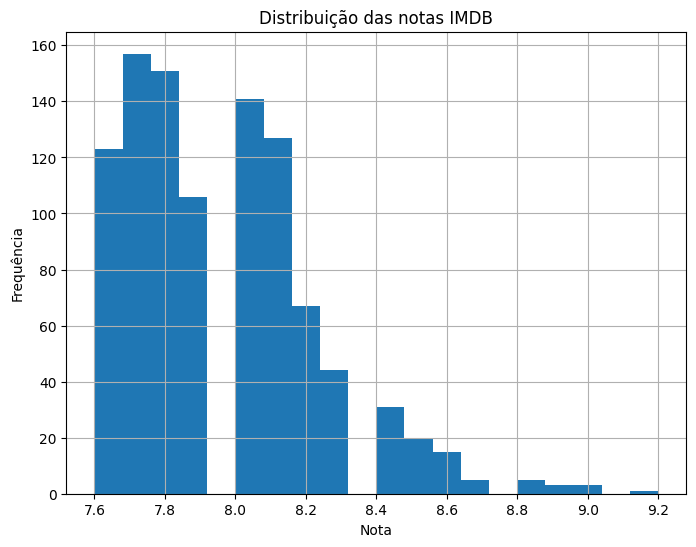

In [9]:
# Distribuição das notas
plt.figure(figsize=(8,6))
df['IMDB_Rating'].hist(bins=20)
plt.title("Distribuição das notas IMDB")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()


<Axes: >

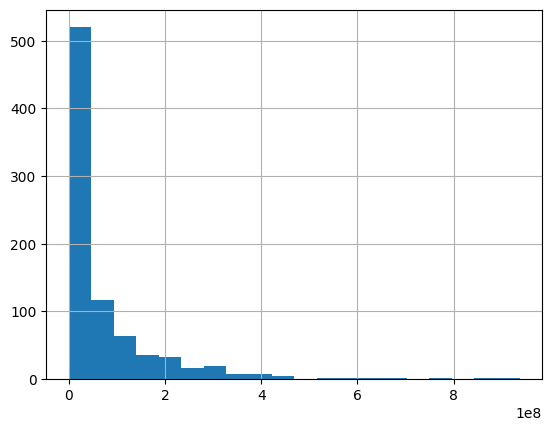

In [10]:
# Distribuição do faturamento bruto (Gross)
df['Gross'] = df['Gross'].astype(str).str.replace(',', '').astype(float)
df['Gross'].hist(bins=20)